In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math

from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
# criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [784, 500, 500, 10]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.07503333333333333


0.07503333333333333

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_decay_step = 5
lr_decay = 0.9
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_decay_step, gamma=lr_decay)

trn_acc_list = []
tst_acc_list = []

n_epochs = 50
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
#         loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        
    scheduler.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [00:22, 133.06it/s]
14it [00:00, 120.60it/s]

Epoch : 1, Train Accuracy : 0.9803833333333334, Test Accuracy : 0.9738


3000it [00:22, 132.13it/s]
14it [00:00, 125.86it/s]

Epoch : 2, Train Accuracy : 0.9873166666666666, Test Accuracy : 0.9767


3000it [00:22, 131.31it/s]
13it [00:00, 126.46it/s]

Epoch : 3, Train Accuracy : 0.9891833333333333, Test Accuracy : 0.9784


3000it [00:23, 130.08it/s]
12it [00:00, 113.89it/s]

Epoch : 4, Train Accuracy : 0.9929, Test Accuracy : 0.9797


3000it [00:23, 128.85it/s]
13it [00:00, 127.07it/s]

Epoch : 5, Train Accuracy : 0.9923166666666666, Test Accuracy : 0.9773


3000it [00:17, 170.64it/s]
27it [00:00, 263.63it/s]

Epoch : 6, Train Accuracy : 0.9957333333333334, Test Accuracy : 0.9798


3000it [00:11, 259.88it/s]
24it [00:00, 233.58it/s]

Epoch : 7, Train Accuracy : 0.9958833333333333, Test Accuracy : 0.98


3000it [00:11, 257.10it/s]
26it [00:00, 259.71it/s]

Epoch : 8, Train Accuracy : 0.9974666666666666, Test Accuracy : 0.9823


3000it [00:11, 259.25it/s]
27it [00:00, 260.57it/s]

Epoch : 9, Train Accuracy : 0.9977166666666667, Test Accuracy : 0.9826


3000it [00:11, 258.09it/s]
26it [00:00, 259.33it/s]

Epoch : 10, Train Accuracy : 0.9968666666666667, Test Accuracy : 0.9792


3000it [00:11, 258.78it/s]
26it [00:00, 252.52it/s]

Epoch : 11, Train Accuracy : 0.9977833333333334, Test Accuracy : 0.9797


3000it [00:11, 258.18it/s]
25it [00:00, 248.32it/s]

Epoch : 12, Train Accuracy : 0.9981166666666667, Test Accuracy : 0.9803


3000it [00:11, 257.72it/s]
26it [00:00, 255.13it/s]

Epoch : 13, Train Accuracy : 0.9989, Test Accuracy : 0.9798


3000it [00:11, 256.74it/s]
26it [00:00, 252.54it/s]

Epoch : 14, Train Accuracy : 0.9988666666666667, Test Accuracy : 0.9806


3000it [00:11, 254.61it/s]
26it [00:00, 256.95it/s]

Epoch : 15, Train Accuracy : 0.99855, Test Accuracy : 0.9815


3000it [00:11, 255.26it/s]
26it [00:00, 259.82it/s]

Epoch : 16, Train Accuracy : 0.9994, Test Accuracy : 0.9817


3000it [00:11, 256.99it/s]
26it [00:00, 255.71it/s]

Epoch : 17, Train Accuracy : 0.9992833333333333, Test Accuracy : 0.981


3000it [00:11, 255.45it/s]
26it [00:00, 252.96it/s]

Epoch : 18, Train Accuracy : 0.99935, Test Accuracy : 0.9805


3000it [00:11, 255.21it/s]
16it [00:00, 153.82it/s]

Epoch : 19, Train Accuracy : 0.9995, Test Accuracy : 0.982


3000it [00:23, 128.86it/s]
8it [00:00, 71.09it/s]

Epoch : 20, Train Accuracy : 0.9992166666666666, Test Accuracy : 0.9812


3000it [00:27, 108.82it/s]
13it [00:00, 127.00it/s]

Epoch : 21, Train Accuracy : 0.99955, Test Accuracy : 0.9813


3000it [00:23, 129.10it/s]
8it [00:00, 73.67it/s]

Epoch : 22, Train Accuracy : 0.9996333333333334, Test Accuracy : 0.9814


3000it [00:38, 77.34it/s]
8it [00:00, 78.33it/s]

Epoch : 23, Train Accuracy : 0.9995333333333334, Test Accuracy : 0.9821


3000it [00:36, 82.74it/s]
9it [00:00, 88.07it/s]

Epoch : 24, Train Accuracy : 0.9996, Test Accuracy : 0.9816


3000it [00:43, 68.46it/s]
7it [00:00, 58.14it/s]

Epoch : 25, Train Accuracy : 0.9994166666666666, Test Accuracy : 0.9791


3000it [00:49, 60.10it/s]
4it [00:00, 38.50it/s]

Epoch : 26, Train Accuracy : 0.9995333333333334, Test Accuracy : 0.9788


3000it [00:54, 55.12it/s]
6it [00:00, 57.75it/s]

Epoch : 27, Train Accuracy : 0.9996666666666667, Test Accuracy : 0.9788


3000it [00:50, 60.00it/s]
5it [00:00, 49.49it/s]

Epoch : 28, Train Accuracy : 0.9997166666666667, Test Accuracy : 0.9807


3000it [00:50, 59.66it/s]
6it [00:00, 51.09it/s]

Epoch : 29, Train Accuracy : 0.9997, Test Accuracy : 0.9811


3000it [00:50, 59.53it/s]
6it [00:00, 56.03it/s]

Epoch : 30, Train Accuracy : 0.9997833333333334, Test Accuracy : 0.9788


3000it [00:50, 59.93it/s]
6it [00:00, 59.00it/s]

Epoch : 31, Train Accuracy : 0.9997833333333334, Test Accuracy : 0.9801


3000it [00:49, 60.41it/s]
6it [00:00, 57.61it/s]

Epoch : 32, Train Accuracy : 0.9998, Test Accuracy : 0.9785


3000it [00:49, 60.93it/s]
6it [00:00, 56.31it/s]

Epoch : 33, Train Accuracy : 0.9997833333333334, Test Accuracy : 0.9805


3000it [00:48, 61.74it/s]
6it [00:00, 55.71it/s]

Epoch : 34, Train Accuracy : 0.99975, Test Accuracy : 0.9784


3000it [00:48, 61.88it/s]
6it [00:00, 53.58it/s]

Epoch : 35, Train Accuracy : 0.9998, Test Accuracy : 0.9788


3000it [00:48, 62.23it/s]
7it [00:00, 61.03it/s]

Epoch : 36, Train Accuracy : 0.9998333333333334, Test Accuracy : 0.9801


3000it [00:48, 62.39it/s]
7it [00:00, 60.60it/s]

Epoch : 37, Train Accuracy : 0.99985, Test Accuracy : 0.9791


3000it [00:48, 62.47it/s]
6it [00:00, 59.22it/s]

Epoch : 38, Train Accuracy : 0.9998166666666667, Test Accuracy : 0.9793


3000it [00:48, 61.54it/s]
9it [00:00, 85.28it/s]

Epoch : 39, Train Accuracy : 0.99985, Test Accuracy : 0.9799


3000it [00:35, 83.60it/s]
8it [00:00, 79.50it/s]

Epoch : 40, Train Accuracy : 0.99985, Test Accuracy : 0.9807


3000it [00:36, 83.22it/s]
9it [00:00, 82.94it/s]

Epoch : 41, Train Accuracy : 0.9998333333333334, Test Accuracy : 0.9801


3000it [00:36, 83.25it/s]
9it [00:00, 84.33it/s]

Epoch : 42, Train Accuracy : 0.99985, Test Accuracy : 0.9803


3000it [00:36, 82.35it/s]
9it [00:00, 88.24it/s]

Epoch : 43, Train Accuracy : 0.9998333333333334, Test Accuracy : 0.9785


3000it [00:36, 81.78it/s]
8it [00:00, 79.03it/s]

Epoch : 44, Train Accuracy : 0.9998666666666667, Test Accuracy : 0.9796


3000it [00:36, 82.10it/s]
8it [00:00, 77.79it/s]

Epoch : 45, Train Accuracy : 0.9998666666666667, Test Accuracy : 0.978


3000it [00:36, 81.96it/s]
13it [00:00, 129.04it/s]

Epoch : 46, Train Accuracy : 0.99985, Test Accuracy : 0.978


3000it [00:20, 149.24it/s]
26it [00:00, 253.75it/s]

Epoch : 47, Train Accuracy : 0.9998666666666667, Test Accuracy : 0.9768


3000it [00:11, 257.47it/s]
27it [00:00, 262.65it/s]

Epoch : 48, Train Accuracy : 0.9998666666666667, Test Accuracy : 0.9784


3000it [00:11, 255.26it/s]
26it [00:00, 254.02it/s]

Epoch : 49, Train Accuracy : 0.9998833333333333, Test Accuracy : 0.9776


3000it [00:11, 257.45it/s]


Epoch : 50, Train Accuracy : 0.9998833333333333, Test Accuracy : 0.9781


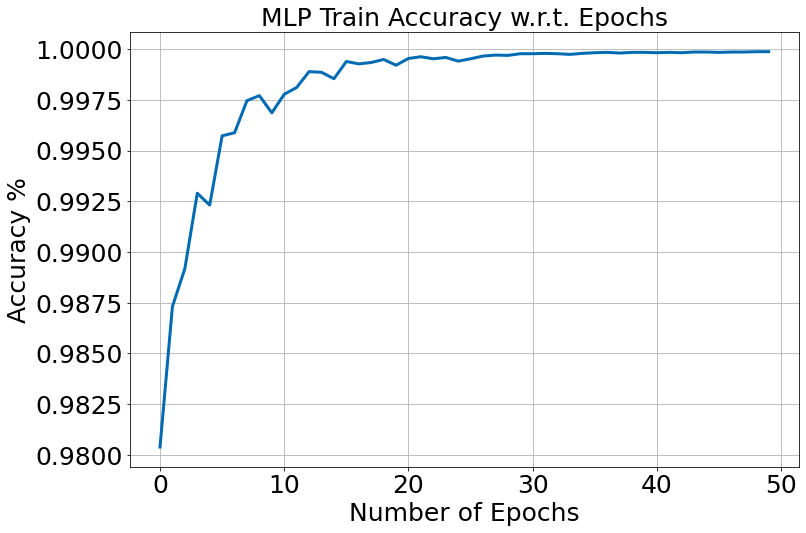

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

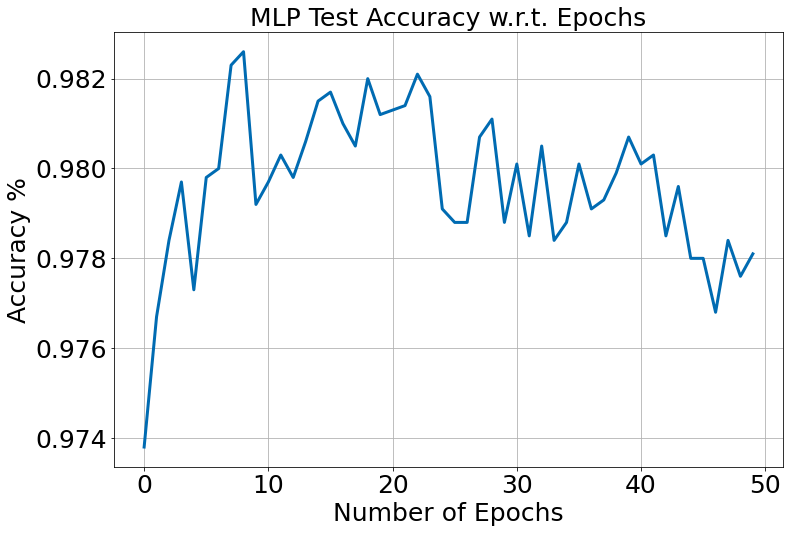

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)